<a href="https://colab.research.google.com/github/bhanu-50/ML-Algorithms/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/SachinScaler/May25_Intro_to_ML_NN/refs/heads/main/cars24-car-price.csv'
df = pd.read_csv(url)
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [3]:
df['make'].unique()

array(['MARUTI', 'HYUNDAI', 'FORD', 'MAHINDRA', 'TATA', 'RENAULT',
       'NISSAN', 'MINI', 'MERCEDES-BENZ', 'TOYOTA', 'FIAT', 'VOLKSWAGEN',
       'HONDA', 'CHEVROLET', 'AMBASSADOR', 'DATSUN', 'KIA', 'BMW',
       'MITSUBISHI', 'AUDI', 'SKODA', 'LAND', 'JAGUAR', 'DAEWOO',
       'BENTLEY', 'MG', 'ISUZU', 'PORSCHE', 'VOLVO', 'LEXUS', 'JEEP',
       'PREMIER', 'MASERATI', 'FORCE', 'LAMBORGHINI', 'FERRARI',
       'OPELCORSA', 'MERCEDES-AMG', 'DC', 'ROLLS-ROYCE', 'OPEL'],
      dtype=object)

In [4]:
df['model'].unique()

array(['ALTO STD', 'GRAND I10 ASTA', 'I20 ASTA', ...,
       'SAFARI 2005-2017 DICOR 2.2 GX 4X2',
       'ECOSPORT 2015-2021 SIGNATURE EDITION PETROL BSIV',
       'YARIS V OPTIONAL CVT BSIV'], dtype=object)

In [5]:
mean_target = df.groupby('make')['selling_price'].mean()

In [6]:
df['make'] = df['make'].map(mean_target)

In [7]:
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,4.684721,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,5.458819,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0


In [8]:
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [9]:
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,4.684721,1.18000,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,5.458819,4.81875,1,0,0,0,0,1,1,1,0


In [10]:
from matplotlib import  pyplot as plt
import seaborn as sns
def plot(col):
  sns.scatterplot(data=df, x=col, y='selling_price')
  plt.show()


In [11]:
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,4.684721,1.18000,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,5.458819,4.81875,1,0,0,0,0,1,1,1,0


In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [13]:
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


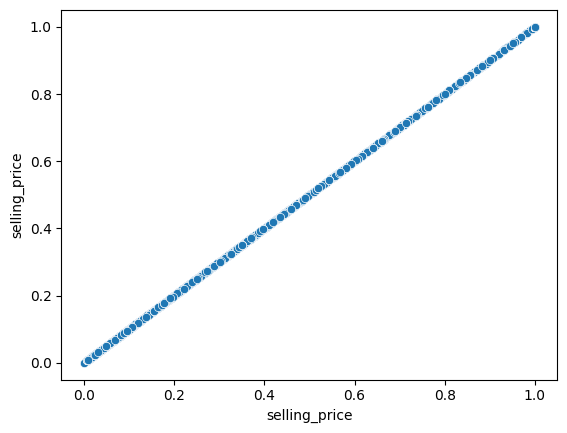

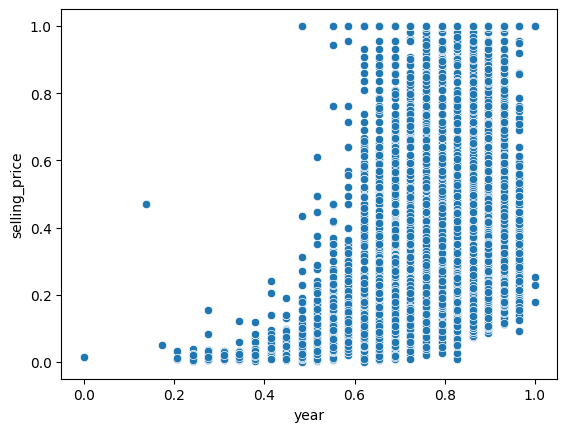

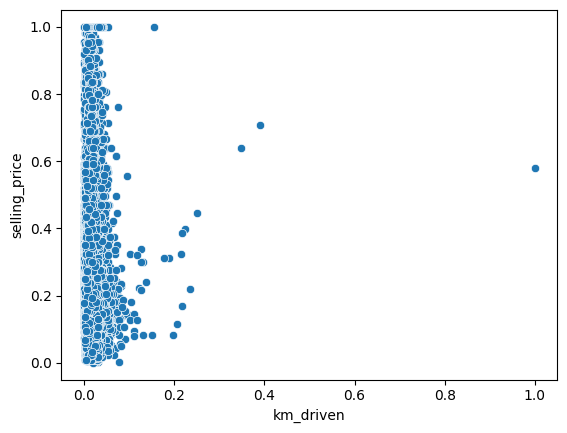

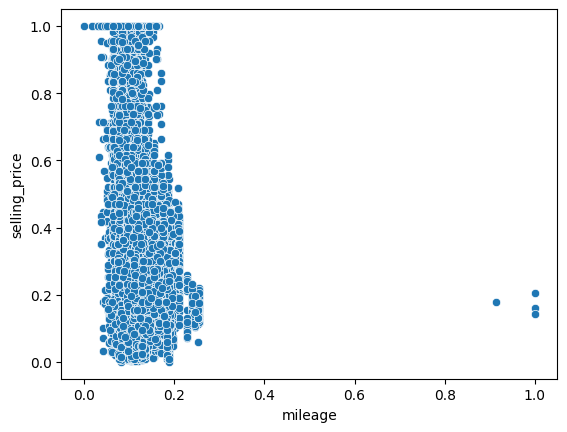

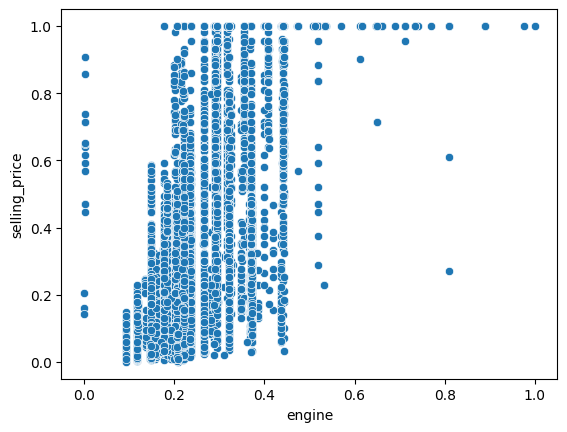

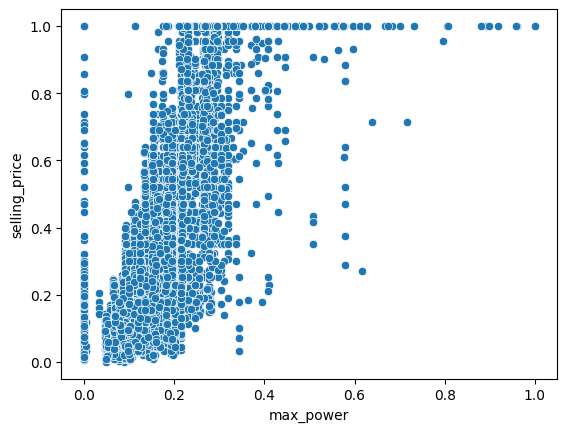

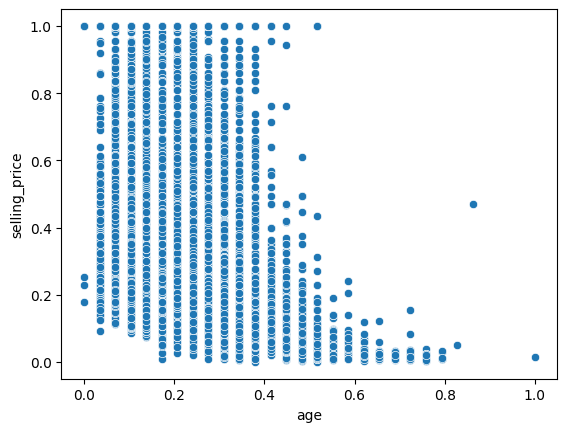

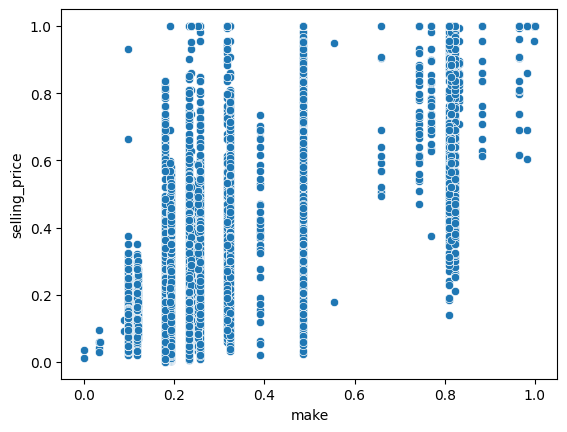

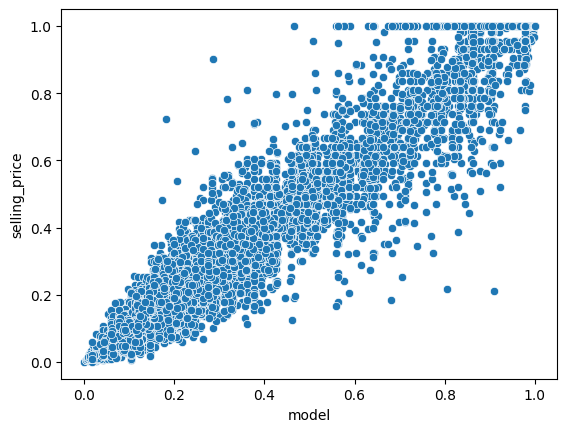

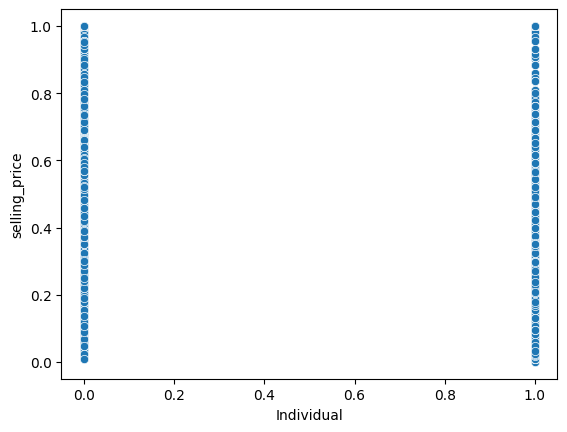

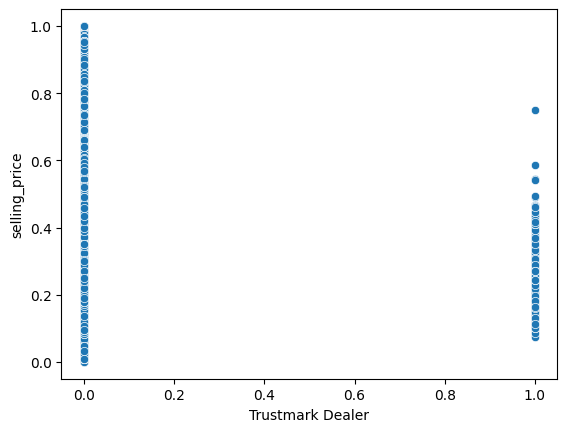

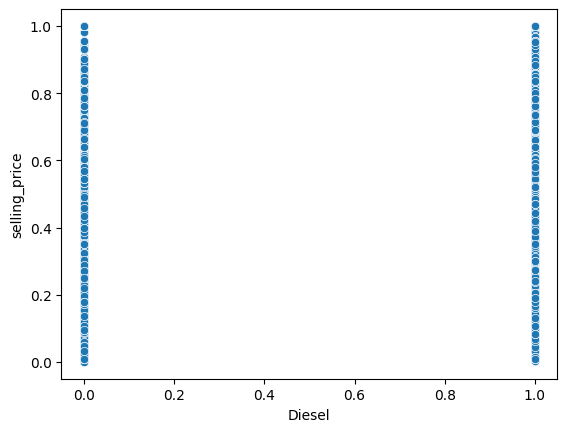

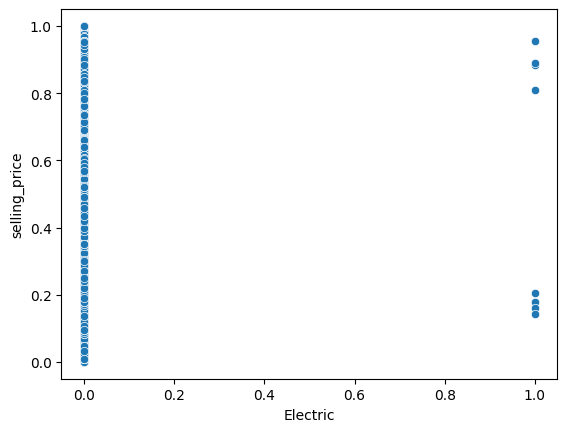

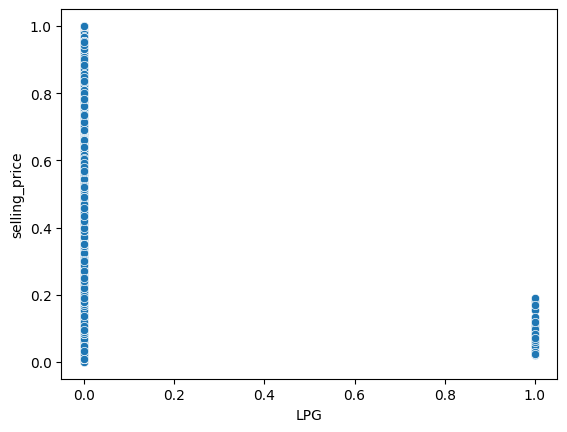

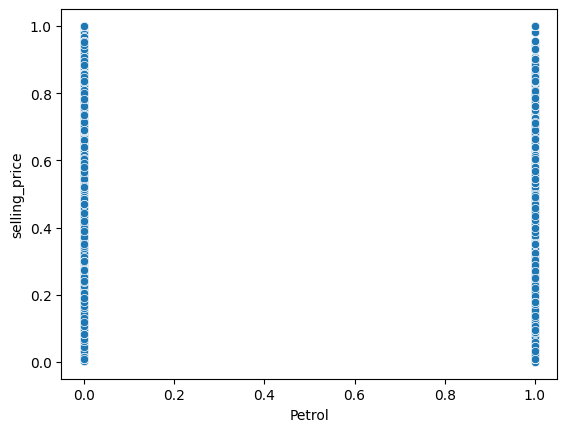

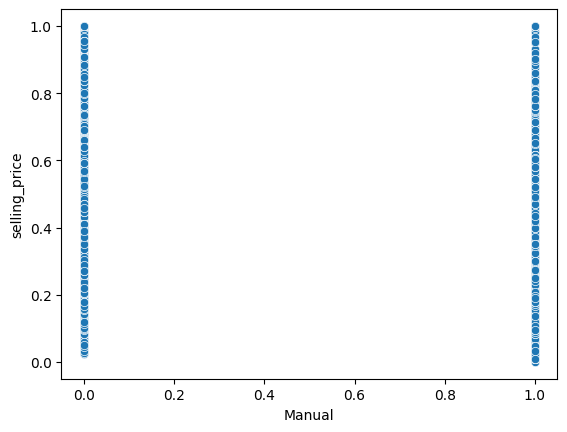

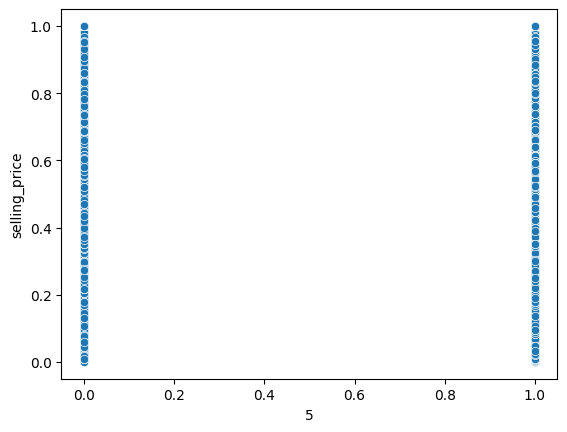

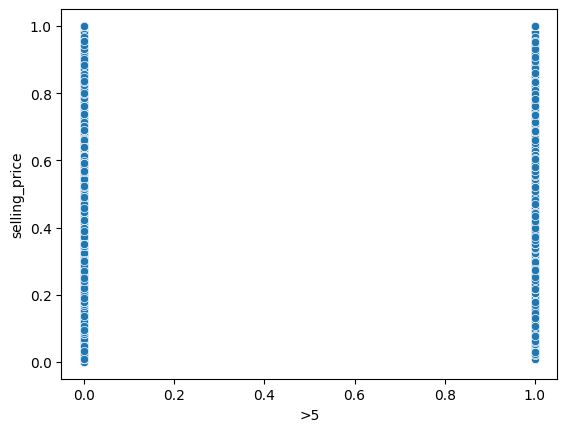

In [14]:
for i in df.columns:
  plot(i)

In [15]:
from sklearn.model_selection import train_test_split
y = df['selling_price']
X = df.drop(columns=['selling_price'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((15856, 17), (15856,), (3964, 17), (3964,))

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_cap = model.predict(X_test)

In [19]:
print(list(zip(y_cap,y_test)))

[(np.float64(0.22524423238786598), 0.325203252032521), (np.float64(0.24848659853442379), 0.2159932047081669), (np.float64(0.26653786975210597), 0.2912267928649442), (np.float64(0.27689998355448175), 0.24026210411357893), (np.float64(0.0734625699342252), 0.08736803785948324), (np.float64(0.5574246329932939), 0.567892246086641), (np.float64(0.08624296832521033), 0.10581240140759637), (np.float64(0.18759872191169227), 0.15532095619463687), (np.float64(0.2387453538930353), 0.22812765441087293), (np.float64(-0.0013554606406259856), 0.04611090887028283), (np.float64(0.15406227364639258), 0.15532095619463687), (np.float64(0.34529213212207377), 0.36888727096226265), (np.float64(0.16222269036226028), 0.2159932047081669), (np.float64(0.4203590310025618), 0.3446183715568506), (np.float64(0.3286912459409755), 0.25191117582817674), (np.float64(0.06958006726567584), 0.11406382720543645), (np.float64(0.35417289848324324), 0.36160660114063903), (np.float64(0.36394341840223127), 0.3543259313190154), (n

In [20]:
model.score(X_train,y_train)

0.9453672329447975

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_cap)

0.9466197443095884

In [22]:
y_mean = y_train.mean()

In [23]:
import numpy as np
SSr = np.sum((y_test-y_cap)**2)
SStot = np.sum((y_test-y_mean)**2)

In [24]:
r = 1 - (SSr/SStot)
r

np.float64(0.9466224796634614)

In [25]:
X1_train = X_train[['year']]
X1_test = X_test[['year']]

In [26]:
X1_train.shape,X1_test.shape

((15856, 1), (3964, 1))

In [27]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X1_train,y_train)

LinearRegression()

In [28]:
acc = model1.score(X1_test,y_test)
acc


0.15662682251646476

In [29]:
X2_train = X_train[['max_power']]
X2_test = X_test[['max_power']]

In [30]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X2_train,y_train)

LinearRegression()

In [38]:
model2.predict(X2_test)

array([0.25078296, 0.26689466, 0.30636832, ..., 0.1790859 , 0.25481088,
       0.34672812])

In [31]:
acc = model2.score(X2_test,y_test)
acc

0.6114745518227227

In [32]:
import pickle

In [35]:
with open('model2.pkl','wb') as file:
    pickle.dump(model2,file)

In [36]:
with open('model2.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [37]:
loaded_model.predict(X2_test)

array([0.25078296, 0.26689466, 0.30636832, ..., 0.1790859 , 0.25481088,
       0.34672812])